## Abordaje tradicional en Machine Learning sobre clasificación de imagenes

**Dataset:** https://www.kaggle.com/datasets/brsdincer/vehicle-detection-image-set

In [1]:
import cv2
from skimage.feature import hog
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline

In [19]:
vehiculos_n_archivos = glob.glob('data_autos/vehicles/*.png')
novehiculos_n_archivos = glob.glob('data_autos/non-vehicles/*.png')

In [21]:
print("Cantidad de imágenes de automóviles: ", len(vehiculos_n_archivos))
print("Cantidad de imágenes de no automóviles: ", len(novehiculos_n_archivos))

Cantidad de imágenes de automóviles:  8792
Cantidad de imágenes de no automóviles:  8968


Text(0.5, 1.0, 'No vehiculo')

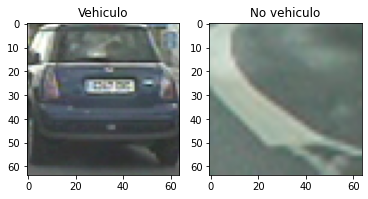

In [74]:
img_vehiculo = cv2.imread(vehiculos_n_archivos[10])
img_novehiculo = cv2.imread(novehiculos_n_archivos[6])

fig, (vehiculo_plt, novehiculo_plt) = plt.subplots(1, 2)

vehiculo_plt.imshow(cv2.cvtColor(img_vehiculo, cv2.COLOR_BGR2RGB))
vehiculo_plt.set_title('Vehiculo')

novehiculo_plt.imshow(cv2.cvtColor(img_novehiculo, cv2.COLOR_BGR2RGB))
novehiculo_plt.set_title('No vehiculo')

## Extractor de Características: HOG (Histogram Oriented Gradient)

In [75]:
carac_hog_vehiculo, img_vehiculo_hog = hog(img_vehiculo[:,:,0], orientations = 9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, visualize=True, feature_vector=True)

carac_hog_novehiculo, img_novehiculo_hog = hog(img_novehiculo[:,:,0], orientations = 9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, visualize=True, feature_vector=True)

Text(0.5, 1.0, 'No Vehiculo: HOG')

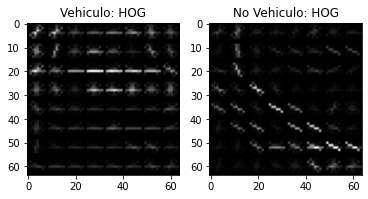

In [76]:
fig2, (hog_vehiculo_plt, hog_novehiculo_plt) = plt.subplots(1, 2)

hog_vehiculo_plt.imshow(img_vehiculo_hog, cmap='gray')
hog_vehiculo_plt.set_title('Vehiculo: HOG')

hog_novehiculo_plt.imshow(img_novehiculo_hog, cmap='gray')
hog_novehiculo_plt.set_title('No Vehiculo: HOG')

In [77]:
print("Dimensiones de la imagen: ", img_vehiculo.shape)

Dimensiones de la imagen:  (64, 64, 3)


In [78]:
def obtener_vector_caracteristicas_all(imgs, orient, pix_per_cell, cell_per_block, hog_channel, color_space="RGB"):
    '''
    Funcion que retorna el vector de caracteristicas de HOG de una lista de imagenes
    '''
    caracteristicas = []
    for file_img in imgs:
        img = mpimg.imread(file_img)
        
        # Para cambiar el color_space de la imagen (si asi se lo desea) --> Agregar mas para realizar el testeo
        if color_space != "RGB":
            if color_space == 'HLS':
                carac_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif color_space == 'HSV':
                carac_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        else:
            carac_img = np.copy(img)
        
        # si hog_chanell es 3 (quiere decir todos los canales)
        if hog_channel == 3:
            hog_caracteristicas =[]
            for c in range(carac_img.shape[2]):
                hog_carac_img = hog(carac_img[:,:,c], orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, visualize=False, feature_vector=True)
                hog_caracteristicas.append(hog_carac_img)
            hog_caracteristicas = np.ravel(hog_caracteristicas)
        else:
            hog_caracteristicas = hog(carac_img[:,:,hog_channel], orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, visualize=False, feature_vector=True)
        
        caracteristicas.append(hog_caracteristicas)
    
    return caracteristicas

In [79]:
def obtener_vector_caracteristicas_img(imagen, orient, pix_per_cell, cell_per_block, hog_channel, color_space="RGB"):
    '''
    Funcion que retorna el vector de caracteristicas de HOG de una lista de imagenes
    '''
    caracteristicas = []

    img = np.copy(imagen)

    # Para cambiar el color_space de la imagen (si asi se lo desea) --> Agregar mas para realizar el testeo
    if color_space != "RGB":
        if color_space == 'HLS':
            carac_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'HSV':
            carac_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    else:
        carac_img = np.copy(img)

    # si hog_chanell es 3 (quiere decir todos los canales)
    if hog_channel == 3:
        hog_caracteristicas =[]
        for c in range(carac_img.shape[2]):
            hog_carac_img = hog(carac_img[:,:,c], orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                              cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, visualize=False, feature_vector=True)
            hog_caracteristicas.append(hog_carac_img)
        hog_caracteristicas = np.ravel(hog_caracteristicas)
    else:
        hog_caracteristicas = hog(carac_img[:,:,hog_channel], orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                              cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, visualize=False, feature_vector=True)

    caracteristicas.append(hog_caracteristicas)
    
    return caracteristicas

## Entrenamiento

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

In [81]:
hog_caracteristicas_vehiculos = obtener_vector_caracteristicas_all(vehiculos_n_archivos, 
                                                                orient=9,
                                                                pix_per_cell=8,
                                                                cell_per_block=2,
                                                                hog_channel=3,
                                                                color_space="RGB")

hog_caracteristicas_no_vehiculos = obtener_vector_caracteristicas_all(novehiculos_n_archivos, 
                                                                orient=9,
                                                                pix_per_cell=8,
                                                                cell_per_block=2,
                                                                hog_channel=3,
                                                                color_space="RGB")

### Estandarizacion de Caracteristicas

In [82]:
X = np.vstack((hog_caracteristicas_vehiculos, hog_caracteristicas_no_vehiculos)).astype(np.float64)

In [83]:
scaler_std = StandardScaler()

# Calcula la media y el desvio estándar que se utilizaran para escalar posteriormente.
X_scaler = scaler_std.fit(X)
# Realiza la estandarizacion centrando y escalando
X_scaled = X_scaler.transform(X)

In [84]:
y = np.hstack((np.ones(len(hog_caracteristicas_vehiculos)), np.zeros(len(hog_caracteristicas_no_vehiculos))))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)

In [86]:
model_svc = svm.LinearSVC()

In [87]:
model_svc.fit(X_train, y_train)

/Users/alejandrodebus/my_envs/dlc/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [88]:
model_svc.score(X_test, y_test)

0.9704391891891891

In [89]:
print('Predicción: ', model_svc.predict(X_test[20:40]))
print('Clase:      ', y_test[20:40])

Predicción:  [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.]
Clase:       [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.]
